In [1]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Load the 'flights' dataset
flights_data = sns.load_dataset("flights")

In [3]:
#Raw Data Exploration
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
flights_data.describe(include='all')

,year,month,passengers
count,144.000000,144,144.000000
unique,NaN,12,NaN
top,NaN,Jan,NaN
freq,NaN,12,NaN
mean,1954.500000,NaN,280.298611
std,3.464102,NaN,119.966317
min,1949.000000,NaN,104.000000
25%,1951.750000,NaN,180.000000
50%,1954.500000,NaN,265.500000
75%,1957.250000,NaN,360.500000


In [6]:
# Pivot the dataset to get yearly passengers sum
flights_pivot = pd.pivot_table(flights_data, values='passengers', index='year', aggfunc='sum').reset_index()

In [7]:
# Prepare data for model fitting
X = np.array(flights_pivot['year']).reshape(-1, 1)
y = flights_pivot['passengers']

In [8]:
# Fit the Linear Regression model
reg = LinearRegression().fit(X, y)

In [9]:
# Predict the passenger counts for the next decade
new_years = np.array(range(1961, 1971)).reshape(-1, 1)
new_passenger_numbers = reg.predict(new_years)

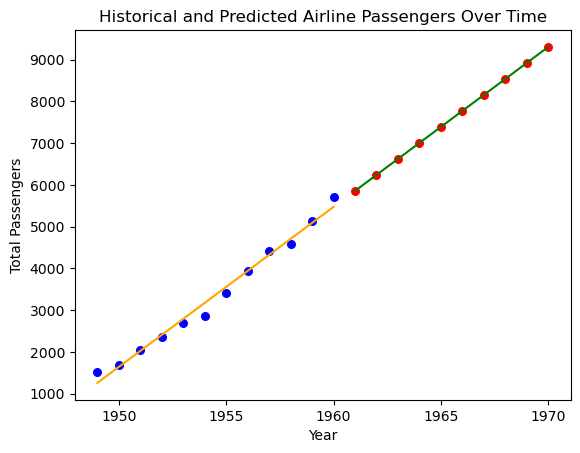

In [10]:
# Plot the original data and the predictions
plt.scatter(X, y, color='blue', s=30)
plt.plot(X, reg.predict(X), color='orange')
plt.scatter(new_years, new_passenger_numbers, color='red', s=30)
plt.plot(new_years, new_passenger_numbers, color='green')

# Set labels and title 
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Historical and Predicted Airline Passengers Over Time")

# Show the plot
plt.show()

In [11]:
print ("R-squared statistic: ", reg.score(X, y))

R-squared statistic:  0.9866055381778157


In [12]:
# Forecast for the next 10 years
print("Year, Predicted Passengers")
for year, passengers in zip(new_years, new_passenger_numbers):
    print(f"{year[0]}, {int(passengers)}")

Year, Predicted Passengers
1961, 5853
1962, 6236
1963, 6619
1964, 7002
1965, 7386
1966, 7769
1967, 8152
1968, 8535
1969, 8918
1970, 9301
